In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
train_dataset = dsets.MNIST(root="./data",
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

In [3]:
len(train_dataset)

60000

2


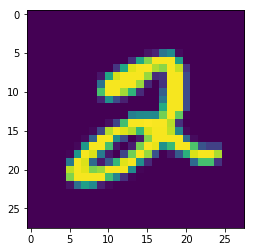

In [4]:
show_img = train_dataset.train_data[5].numpy().reshape(28,28)
label = train_dataset.train_labels[5]
print(label)
plt.imshow(show_img)


In [5]:
test_dataset = dsets.MNIST("./data",
                          train=False,
                          transform = transforms.ToTensor(),
                          download=True)

In [6]:
len(test_dataset)

10000

9


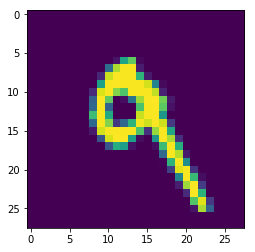

In [7]:
show_img = test_dataset.test_data[7].numpy().reshape(28,28)
label = test_dataset.test_labels[7]
print(label)
plt.imshow(show_img)


In [8]:
test_dataset.test_data[1].size()

torch.Size([28, 28])

In [9]:
batch_size=100
n_iters=3000
num_epochs = n_iters / (len(train_dataset)/batch_size)
print(num_epochs)

5.0


In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size = batch_size,
                                          shuffle=True)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = batch_size,
                                          shuffle=True)

In [11]:
import collections

In [12]:
isinstance(train_loader, collections.Iterable)

True

In [47]:
class FeedForwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_dim, hidden_size, output_dim):
        super(FeedForwardNeuralNetworkModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_size)
        self.relu1 = nn.ReLU()
        
        
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden_size, output_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.relu2(out)
        
        
        out = self.fc3(out)
        
        
        return out
        

In [48]:
input_dim = 28*28
hidden_size=100
output_dim = 10
model = FeedForwardNeuralNetworkModel(input_dim, hidden_size, output_dim)

In [49]:
criterion = nn.CrossEntropyLoss()

In [50]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [51]:
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

torch.Size([100, 784])
torch.Size([100])


In [52]:
iter = 0
for epoch in range(int(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
              
        loss.backward()
        optimizer.step()
              
        
        iter = iter + 1
        if (iter % 500 ==0):
              correct = 0.0
              total = 0.0 
              for i, (images, labels) in enumerate(test_loader):
                  images = Variable(images.view(-1, 28*28))
                  outputs = model(images)
                  labels2 = Variable(labels)
                  _, predicted = torch.max(outputs, 1)
                  total += labels.size(0) 
                  correct += (predicted.data == labels).sum()
                  
              if(iter==500):
                    print("this is iteration 500")
                    print(outputs[0,:])
              #print("Correct: {} ".format(correct))
              #print("Total: {}".format(total))
              accuracy = 100.0 * correct*1.0/(1.0*total)
              print("Iteration:{}, Loss:{},accuracy:{}".format(iter, loss.data, accuracy) )
                
                    
        
        
        
        
        

this is iteration 500
Variable containing:
-1.2196
-0.0436
-0.0578
 1.6402
-2.5003
 2.5303
-1.1618
-3.8635
 5.8804
-0.6553
[torch.FloatTensor of size 10]

Iteration:500, Loss:
 0.4725
[torch.FloatTensor of size 1]
,accuracy:89.78
Iteration:1000, Loss:
 0.2375
[torch.FloatTensor of size 1]
,accuracy:93.74
Iteration:1500, Loss:
1.00000e-02 *
  7.8203
[torch.FloatTensor of size 1]
,accuracy:95.14
Iteration:2000, Loss:
 0.1076
[torch.FloatTensor of size 1]
,accuracy:95.35
Iteration:2500, Loss:
1.00000e-02 *
  9.8585
[torch.FloatTensor of size 1]
,accuracy:96.39
Iteration:3000, Loss:
1.00000e-02 *
  6.9916
[torch.FloatTensor of size 1]
,accuracy:96.52


OUTPUTS
torch.Size([100, 10])
Variable containing:
 1.2801
-1.3909
-2.2512
-0.2965
-0.5763
 8.5497
-0.9117
-2.5923
-1.5450
-0.0568
[torch.FloatTensor of size 10]

PREDICTED
5
LABELS
5


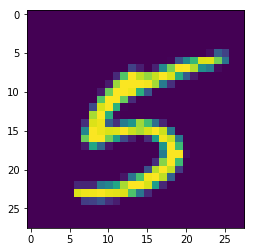

In [54]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = batch_size,
                                          shuffle=False)

image_num=52
iter_test=0
for i, (images, labels) in enumerate(test_loader):
     iter_test+=1
     
     images = Variable(images.view(-1, 28*28))
     
     outputs = model(images)
     plt.imshow(images.data[image_num].numpy().reshape(28,28))
     labels2 = Variable(labels)
     _, predicted = torch.max(outputs, 1)
     if(iter_test==1):
        print("OUTPUTS")
        print(outputs.size())
        
        print(outputs[image_num,:])
        _, predicted = torch.max(outputs.data,1)
        print("PREDICTED")
        print(predicted[image_num])
        print("LABELS")
        print(labels[image_num])
        break
        
    

In [37]:

\